<a href="https://colab.research.google.com/github/MoRebaie/CNN-For-End-to-End-Deblurring--Keras/blob/master/CelebA_Deblurring_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
from google.colab import files
from IPython.display import Image


** Importing Necessary Packages **

In [13]:
from google.colab import files
uploaded = files.upload()

Saving 000001.png to 000001.png
Saving 000002.png to 000002.png
Saving 000003.png to 000003.png
Saving 000004.png to 000004.png
Saving 000005.png to 000005.png
Saving 000006.png to 000006.png
Saving 000007.png to 000007.png
Saving 000008.png to 000008.png
Saving 000009.png to 000009.png
Saving 000010.png to 000010.png


In [25]:
uploaded1 = files.upload()

Saving 0000011.png to 0000011.png
Saving 0000022.png to 0000022.png
Saving 0000033.png to 0000033.png
Saving 0000044.png to 0000044.png
Saving 0000055.png to 0000055.png
Saving 0000066.png to 0000066.png
Saving 0000077.png to 0000077.png
Saving 0000088.png to 0000088.png
Saving 0000099.png to 0000099.png
Saving 00001010.png to 00001010.png


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from skimage.io import imread
from glob import glob

In [2]:
from keras.layers import Conv2D, BatchNormalization, Activation
from keras.models import Model, Input
from keras.optimizers import Adam
import keras.backend as K
#import cv2  


Using TensorFlow backend.


In [26]:
uploaded1

{'0000011.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00@\x00\x00\x00@\x08\x02\x00\x00\x00%\x0b\xe6\x89\x00\x00\x1aPIDATx\x9c-zK\xb2$9\x92\x9c\xda\x07\x80{\xc4\xcb\xac\xae\x9e\xe6j\xb8\xe2\xc9y\x0e^\x80ga\x8bLOefD\xb8\x0303\xe5"{ck\x88)D\x01\xfd\xc8\xff\xfd?\xff\xdb\x805?\xd7\xfb_\xeb\x9a\x82\xe9\xc2\xee\xa1\xde\xdap\xef\x87\xb9\xb66\xba\x1a\xc5\xa4t\xde\x17\xef\x0c\x91&2\xdaPZ\x8b\x99\xb1\xd7\xf5\xbe\xfe\xfa\xd7\xfb\xe7\xcf\xfbz\xcfy\x7f\xfe\xba\xeey\xcd\xa8\xbdf\x96\xb8\xb2\x1fM\xbcK;\x12\xfb5\xe3\xa3\xa8\xc5\x8b\xb1\xaf\xbdv\xd4Lo||\x9d\xde\xbe\x8e1\x00\xfd\xe7\x7f\xfd\xf8\xe7\xff\xfb\xe7?\xff\xf5\xe3\xf5\x993\xd2O\xfb\xf6\xf5\xfc\xc7\x7f|\xff\xdb\xdf\xff\xfe\xb7?\xbf\xfd\xe3\x8f\x7f\xfc\xe3\x7f\xfe\xe7\x7f\xfe\xe7\xff\xf2\x89~\xc2\xa1K\xfb\xd3\xa2\xbc\x99VH;]\xc5\xcf!\x82\xae\xbd\xcca\x8f\xd1\x86\x88\x8c\xe3\xfb\xbc64\x01S\x98U.\xb8\xde3K\xd7\x11s\xc7{\xe6{\xedW\xce\x9f\x9f\\\xf7\xf5\x89\xaa\xda\n\xeb\xb3\xceG\xf9\xceM\\\xb1\xdf\xbb2vA\xd6\x8cX\x99s\x8bam\x8e\xa3\xae\xe7SJ

** Loading Images **

Only showing a small set of images from the local test set we generated.

In [0]:
clean_images_path = glob('./CelebA Images/Clean Images/*.png')
blurry_images_path = glob('./CelebA Images/Blurry Images/*.png')
#clean_images_path = '000001.png'
#blurry_images_path = '000001 (1).png'
Images = []; Blurry = []
#for image, blurry in zip(clean_images_path, blurry_images_path):
for image in uploaded:
    Images.append(imread(image))
for blurry in uploaded1:
    Blurry.append(imread(blurry))
#Images = np.array(Images).astype('float32')
Images = np.array(Images, dtype = 'float32')
Blurry = np.array(Blurry, dtype = 'float32')
#Blurry = np.array(Blurry).astype('float32')

In [18]:
Images

array([[[[213., 212., 210.],
         [225., 224., 220.],
         [229., 226., 219.],
         ...,
         [ 71.,  54.,  34.],
         [ 99.,  83.,  60.],
         [130., 114.,  89.]],

        [[190., 189., 187.],
         [211., 208., 203.],
         [220., 216., 207.],
         ...,
         [ 85.,  68.,  48.],
         [ 99.,  83.,  60.],
         [110.,  94.,  69.]],

        [[173., 169., 166.],
         [200., 197., 192.],
         [212., 208., 199.],
         ...,
         [138., 122.,  99.],
         [153., 137., 112.],
         [155., 139., 113.]],

        ...,

        [[180., 158., 111.],
         [171., 144.,  99.],
         [168., 137.,  91.],
         ...,
         [204., 171., 136.],
         [203., 167., 131.],
         [180., 142., 106.]],

        [[184., 162., 115.],
         [180., 153., 108.],
         [180., 149., 103.],
         ...,
         [197., 165., 127.],
         [184., 148., 112.],
         [184., 146., 110.]],

        [[190., 168., 121.],
       

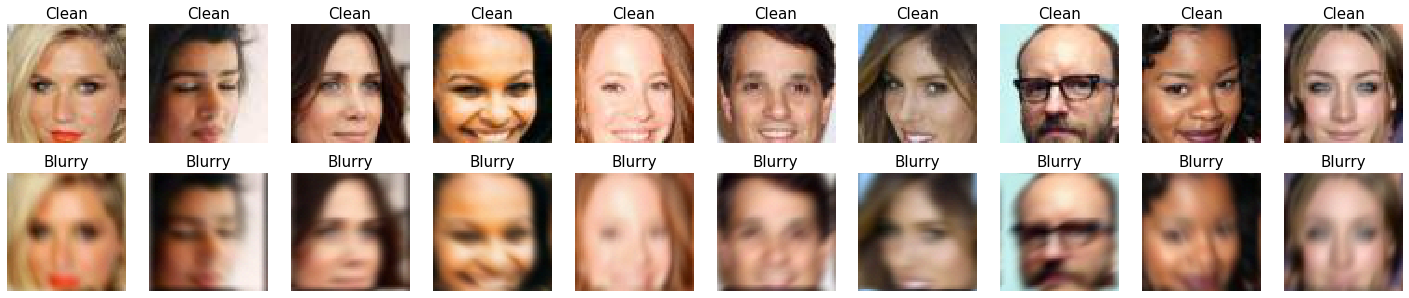

In [28]:
f, ax = plt.subplots(2,10,figsize=(25,5))
for i in range(10):
    ax[0,i].imshow(Images[i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(Blurry[i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
plt.show()

** Defining CNN Model for Training Model **

The model has been trained on a much larger dataset of CelebA images.

In [0]:
deblur_CNN_input = Input(shape=(64,64,3))

#HIDDEN LAYERS
deblur_CNN_layer1 = Conv2D(filters=128, kernel_size=10, strides = 1, padding='same')(deblur_CNN_input)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer1)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer1)

deblur_CNN_layer2 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer1)
deblur_CNN_layer2 = BatchNormalization()(deblur_CNN_layer2)
deblur_CNN_layer2 = Activation('relu')(deblur_CNN_layer2)

deblur_CNN_layer3 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer2)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer3)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer3)

deblur_CNN_layer4 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer3)
deblur_CNN_layer4 = BatchNormalization()(deblur_CNN_layer4)
deblur_CNN_layer4 = Activation('relu')(deblur_CNN_layer4)

deblur_CNN_layer5 = Conv2D(filters=128, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer4)
deblur_CNN_layer5 = BatchNormalization()(deblur_CNN_layer5)
deblur_CNN_layer5 = Activation('relu')(deblur_CNN_layer5)

deblur_CNN_layer6 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer5)
deblur_CNN_layer6 = BatchNormalization()(deblur_CNN_layer6)
deblur_CNN_layer6 = Activation('relu')(deblur_CNN_layer6)

deblur_CNN_layer7 = Conv2D(filters=512, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer6)
deblur_CNN_layer7 = BatchNormalization()(deblur_CNN_layer7)
deblur_CNN_layer7 = Activation('relu')(deblur_CNN_layer7)

deblur_CNN_layer8 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer7)
deblur_CNN_layer8 = BatchNormalization()(deblur_CNN_layer8)
deblur_CNN_layer8 = Activation('relu')(deblur_CNN_layer8)

deblur_CNN_layer9 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer8)
deblur_CNN_layer9 = BatchNormalization()(deblur_CNN_layer9)
deblur_CNN_layer9 = Activation('relu')(deblur_CNN_layer9)

deblur_CNN_layer10 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer9)
deblur_CNN_layer10 = BatchNormalization()(deblur_CNN_layer10)
deblur_CNN_layer10 = Activation('relu')(deblur_CNN_layer10)

deblur_CNN_layer11 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer10)
deblur_CNN_layer11 = BatchNormalization()(deblur_CNN_layer11)
deblur_CNN_layer11 = Activation('relu')(deblur_CNN_layer11)

deblur_CNN_layer12 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer11)
deblur_CNN_layer12 = BatchNormalization()(deblur_CNN_layer12)
deblur_CNN_layer12 = Activation('relu')(deblur_CNN_layer12)

deblur_CNN_layer13 = Conv2D(filters=256, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer12)
deblur_CNN_layer13 = BatchNormalization()(deblur_CNN_layer13)
deblur_CNN_layer13 = Activation('relu')(deblur_CNN_layer13)

deblur_CNN_layer14 = Conv2D(filters=64, kernel_size=7, strides = 1, padding='same')(deblur_CNN_layer13)
deblur_CNN_layer14 = BatchNormalization()(deblur_CNN_layer14)
deblur_CNN_layer14 = Activation('relu')(deblur_CNN_layer14)

deblur_CNN_output = Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')(deblur_CNN_layer14)

deblur_CNN = Model(inputs= deblur_CNN_input, outputs=deblur_CNN_output )

In [21]:
deblur_CNN.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       38528     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 320)       41280     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 320)       1280      
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 320)       0   

In [0]:
adam = Adam(lr= 0.00001)
deblur_CNN.compile(optimizer= adam, loss= 'mean_squared_error')
deblur_CNN.load_weights('celebA_deblur_cnn_weights.h5')

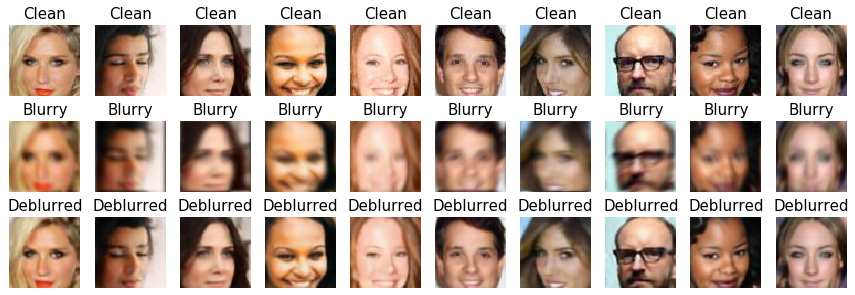

In [31]:
Deblurred = deblur_CNN.predict(Blurry)
Deblurred = np.clip(Deblurred, 0, 255)
f, ax = plt.subplots(3,10, figsize=(15,5))
for i in range(10):
    ax[0,i].imshow(Images[i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(Blurry[i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
    ax[2,i].imshow(Deblurred[i].astype('uint8'));  ax[2,i].axis('Off'); ax[2,i].set_title('Deblurred', size=15)
plt.show()

In [98]:
#Deblurred = deblur_CNN.predict('head-blur.jpg')
im = files.upload()

Saving head-blur2.jpg to head-blur2.jpg


In [0]:
ims=[];

In [0]:
for im1 in im:
  ims.append(imread(im1))

In [0]:
ims = np.array(ims, dtype = 'float32')


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


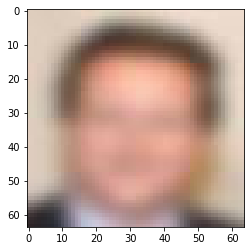

In [106]:
img=mpimg.imread(im1)
imgplot = plt.imshow(img)
plt.show()

In [0]:
ims.append(img)

In [121]:
img.shape

(64, 64, 3)

In [0]:
d = deblur_CNN.predict(ims)

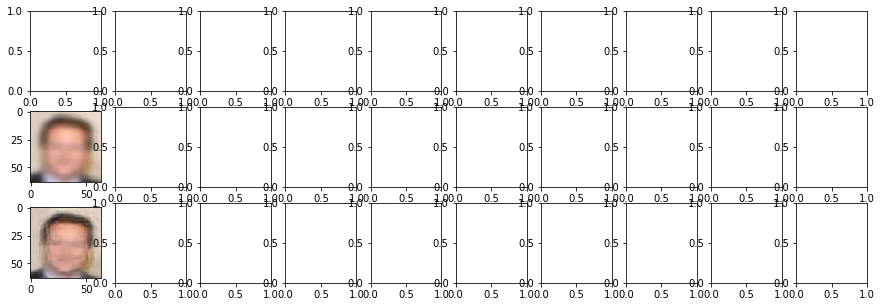

In [138]:
d = np.clip(d, 0, 255)
f, ax = plt.subplots(3,10, figsize=(15,5))
ax[1,0].imshow(ims[0].astype('uint8'));
ax[2,0].imshow(d[0].astype('uint8'));